# CLASIFICADOR NAIVE-BAYES
#### Eng. Abraham Montes - Adjunct professor Introduction to A.I. - PUJ

In [125]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv('iris.csv')

### Parts of a Flower

<img src="img/flower.png" alt="PARTS OF A FLOWER" title="NPARTS OF A FLOWER" width="300" style="float: left"/><br><br><br><br><br><br>

In [44]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [41]:
import matplotlib.pyplot as plt
import seaborn as sb

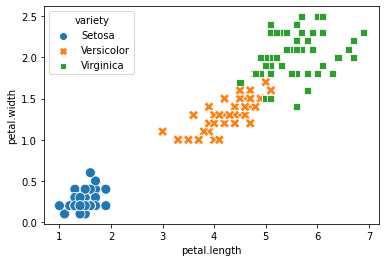

In [42]:
sb.scatterplot(
    data=df_petal, x="petal.length", y="petal.width", hue="variety", style="variety", legend='full', s=100);

In [46]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='variety', ylabel='petal.length'>

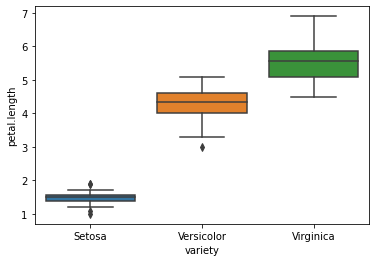

In [97]:
sb.boxplot(x="variety", y="petal.length", data=df)

<AxesSubplot:xlabel='variety', ylabel='petal.width'>

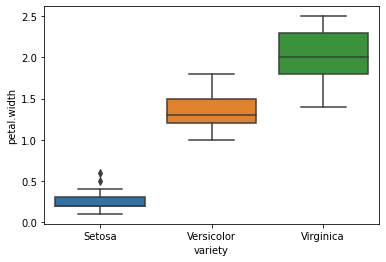

In [98]:
sb.boxplot(x="variety", y="petal.width", data=df)

<AxesSubplot:xlabel='variety', ylabel='sepal.length'>

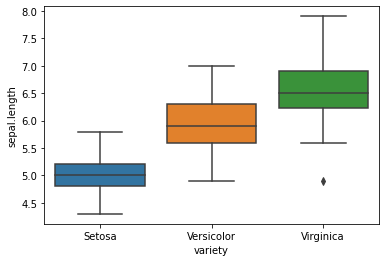

In [99]:
sb.boxplot(x="variety", y="sepal.length", data=df)

<AxesSubplot:xlabel='variety', ylabel='sepal.width'>

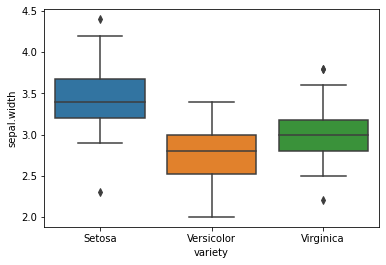

In [100]:
sb.boxplot(x="variety", y="sepal.width", data=df)

In [103]:
df_new = pd.DataFrame()
df_new['PL_less_4.0'] = np.where(df['petal.length']<4.0, 1, 0)
df_new['PW_less_1.5'] = np.where(df['petal.width']<1.5, 1, 0)
df_new['SL_less_6.0'] = np.where(df['sepal.length']<6.0, 1, 0)
df_new['SW_less_3.0'] = np.where(df['sepal.width']<3.0, 1, 0)
df_new['Versicolor'] = np.where(df_petal['variety']=="Versicolor", 1, 0)
df_new

,PL_less_4.0,PW_less_1.5,SL_less_6.0,SW_less_3.0,Versicolor
0,1,1,1,0,0
1,1,1,1,0,0
2,1,1,1,0,0
3,1,1,1,0,0
4,1,1,1,0,0
...,...,...,...,...,...
145,0,0,0,0,0
146,0,0,0,1,0
147,0,0,0,0,0
148,0,0,0,0,0


### Analicemos este dataset: 
### Se tienen 4 propiedades: PL menor a 4.0, PW menor a 1.5, SL menor a 6.0 y SW menor a 3.0. Cada una puede ser 0 o 1 en funcion de las medidas de la flor. Ademas, tiene una etiqueta "Versicolor", que es 1 si la flor pertenece a la variedad Versicolor, o 0 en caso contrario.
### Si una flor tiene PL=2.5, PW=0.9, SL=5.4 y SW=1.0, entonces apareceria en la tabla como [1,1,1,1]. Ademas, si es de la variedad Versicolor, la etiqueta sera 1. 
### Este dataset se construye a partir del dataset original "Iris" a conveniencia para el ejemplo del uso de un clasificador Naive-Bayes

# -------------------------------------

### Utilizando un clasificador Naive-Bayes, clasifiquemos una flor que: 
#### - Tiene petalos con longitud menor a 4.0
#### - Tiene petalos con ancho menor a 1.5
#### - Tiene sepalos con longitud menor a 6.0
#### - Tiene sepalos con ancho menor a 3.0

## Para la clase: ES VERSICOLOR, 
$$
P_1 = P(y=Versicolor)*\prod_{j=1}^N P(x_j|y=Versicolor)
$$

In [104]:
sum(df_new['Versicolor']==1)

50

In [105]:
sum(((df_new['Versicolor']==1) & (df_new['PL_less_4.0']==1)))

11

In [106]:
sum(((df_new['Versicolor']==1) & (df_new['PW_less_1.5']==1)))

35

In [107]:
sum(((df_new['Versicolor']==1) & (df_new['SL_less_6.0']==1)))

26

In [108]:
sum(((df_new['Versicolor']==1) & (df_new['SW_less_3.0']==1)))

34

In [109]:
p1 = (50/150)*(11/50)*(35/50)*(26/50)*(34/50)
p1

0.018151466666666668

## Para la clase: NO ES VERSICOLOR, 
$$
P_2 = P(y=NOVersicolor)*\prod_{j=1}^N P(x_j|y=NOVersicolor)
$$

In [110]:
sum(df_new['Versicolor']==0)

100

In [111]:
sum(((df_new['Versicolor']==0) & (df_new['PL_less_4.0']==1)))

50

In [112]:
sum(((df_new['Versicolor']==0) & (df_new['PW_less_1.5']==1)))

51

In [113]:
sum(((df_new['Versicolor']==0) & (df_new['SL_less_6.0']==1)))

57

In [114]:
sum(((df_new['Versicolor']==0) & (df_new['SW_less_3.0']==1)))

23

In [115]:
p2 = (100/150)*(50/100)*(51/100)*(57/100)*(23/100)
p2

0.022286999999999998

### Dado que P2 es mayor, entonces el clasificador de Naive-Bayes clasifica esa flor como NO Versicolor

### Otros ejemplos utilizando la libreria Sk-learn

In [116]:
X = df_new[['PL_less_4.0','PW_less_1.5', 'SL_less_6.0', 'SW_less_3.0']].values
y = df_new['Versicolor'].values

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [120]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [122]:
gnb.predict(np.array([1,1,1,1]).reshape((1, -1)))

array([1])

In [123]:
gnb.predict(np.array([0,0,0,0]).reshape((1, -1)))

array([0])

In [124]:
gnb.predict(np.array([0,1,0,1]).reshape((1, -1)))

array([1])